<a href="https://colab.research.google.com/github/Guzman2304/IA_2025_GuzmanQuintero/blob/main/ClostersTareaVideo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-MEANS
Metodo de agrupamiento que divide un conjunto de daatos en K grupos o closteres a partir de centroides.

### Practica
Vamos a analizar el archivo analisis.csv en donde se evalua a la luz del "Ocean: The Big Five" aspectos de la personalidad de diferentes figuras publicas en X.

+ Usuario: El nombre de la figura publica en X.
+ "op" : Oppens to experience.
+ "co" : Conscientiousness.
+ "ex" : Extraversion.
+ "ag" : agreebleness.
+ "ne" : Neunoticisn.
+ wordcount : la cantidad de palabras promedio usadas en los tweeds.
+ categorias: Actividad laboral del usuario

### Categorias:

1. Actor/Actriz
2. Cantante
3. Modelo
4. TV. series
5. Radio.
6. Tecnologia
7. Deportes
8. Politica
9. Escritores

In [ ]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"]=(16,9)
plt.style.use("ggplot")

In [ ]:
dataframe=pd.read_csv("analisis.csv")
dataframe.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [ ]:
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [ ]:
dataframe.groupby("categoria").size()

,0
categoria,
1,27
2,34
3,9
4,19
5,4
6,8
7,17
8,16
9,6


## Visualizacion de datos

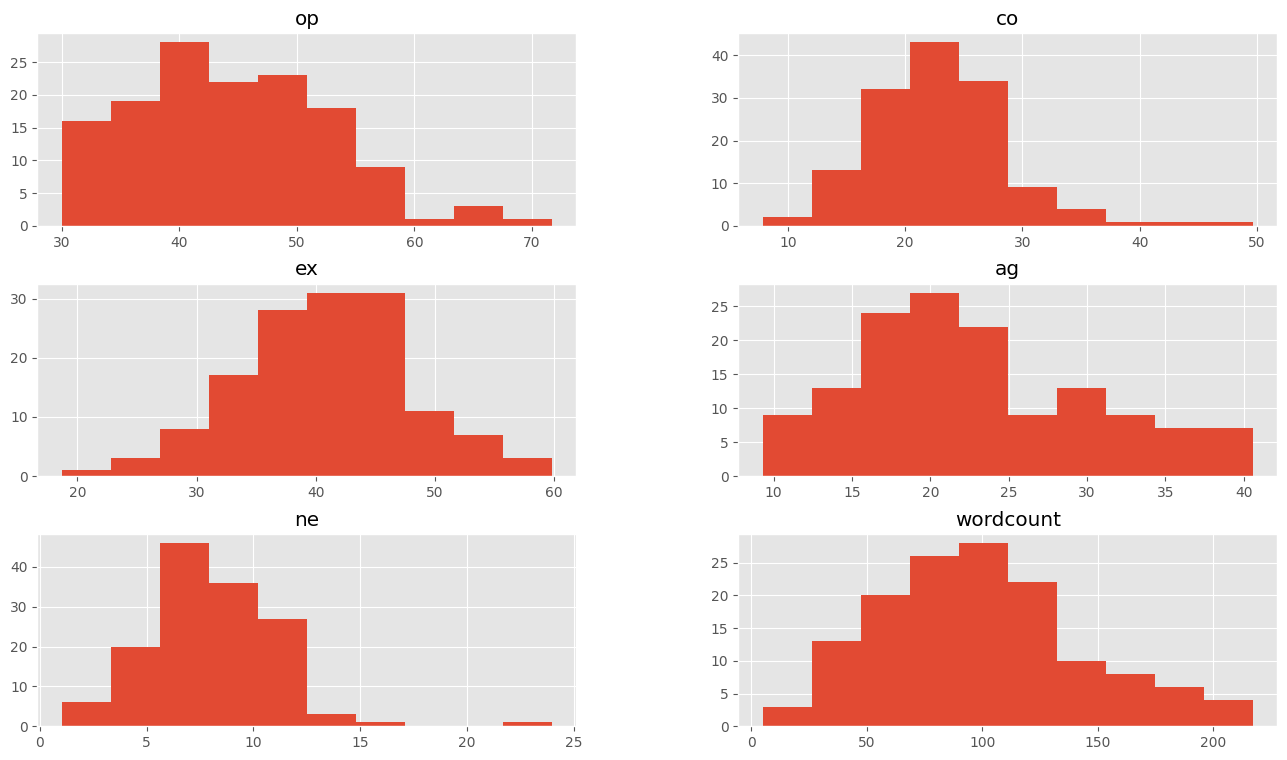

In [ ]:
dataframe.drop(columns=["categoria"]).hist()
plt.show()

Se seleccionara como dimensiones op.ex y ag. Se cruzara con el fin de encontrar alguna pista de agrupacion y relacion entre categorias.

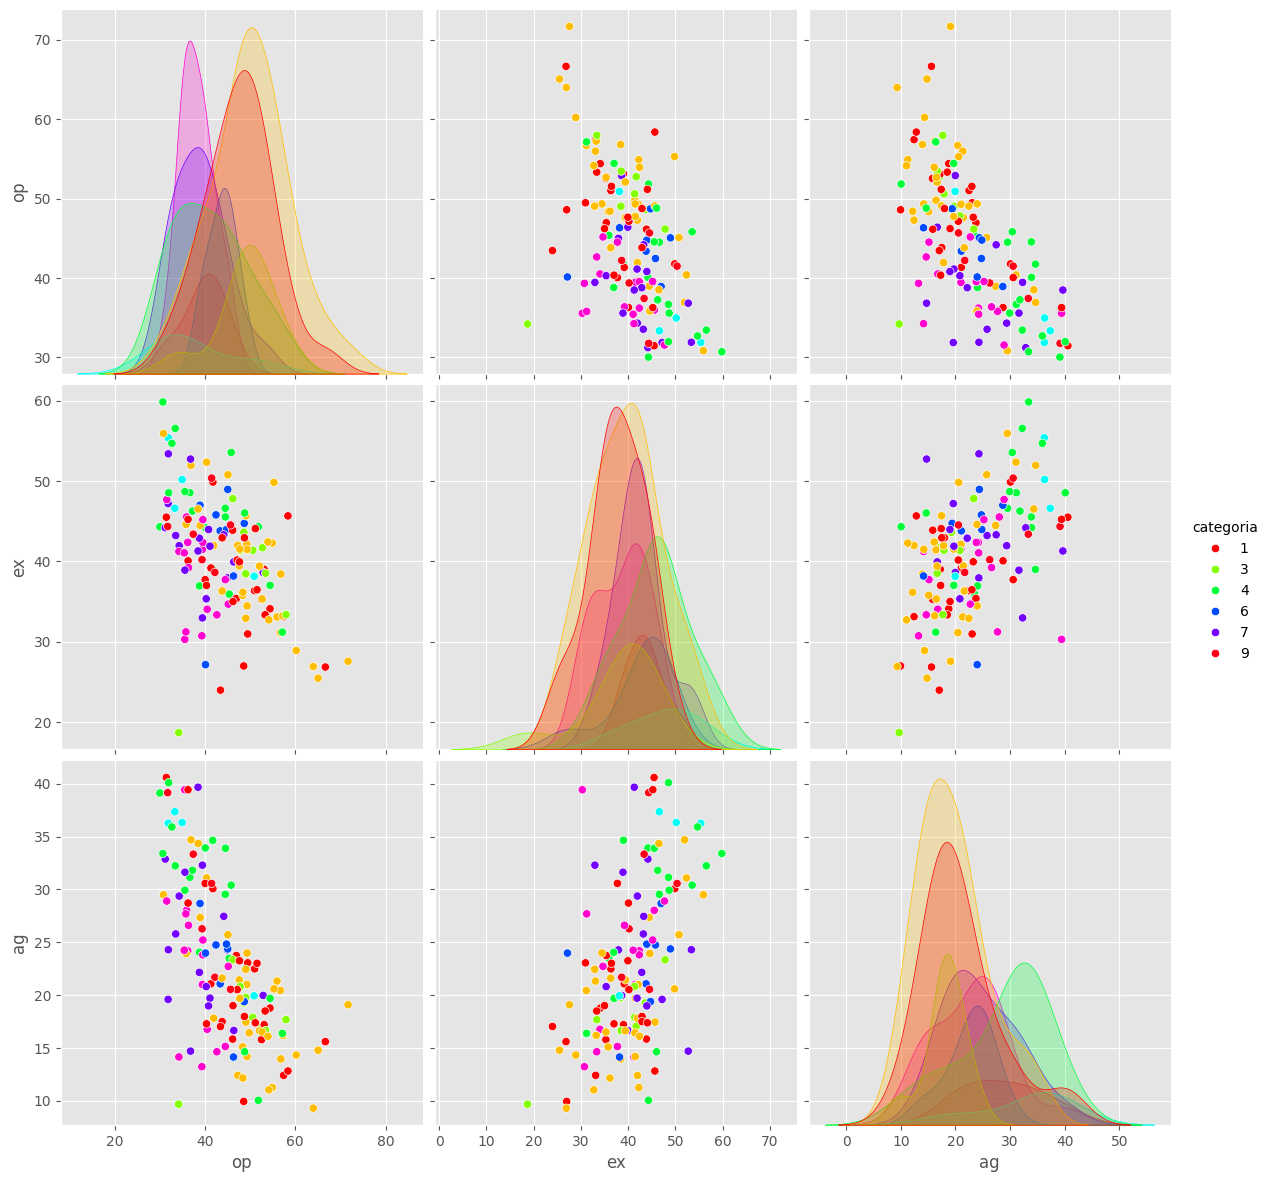

In [ ]:
sb.pairplot(dataframe.dropna(),hue="categoria",height=4,vars=["op","ex","ag"],kind="scatter",palette="hsv")
plt.show()

Revisando la grafica no se observa ningun tipo de agrupacion o correlacion entre usuarios y sus categorias.

##Definicion de entrada
Se concreta la estructura de datos que se empleara para alimentar el algoritmo. Se cargan las columnas op,ex y ag en la variable X

In [ ]:
X=np.array(dataframe[["op","ex","ag"]])
y=np.array(dataframe["categoria"])

X.shape

(140, 3)

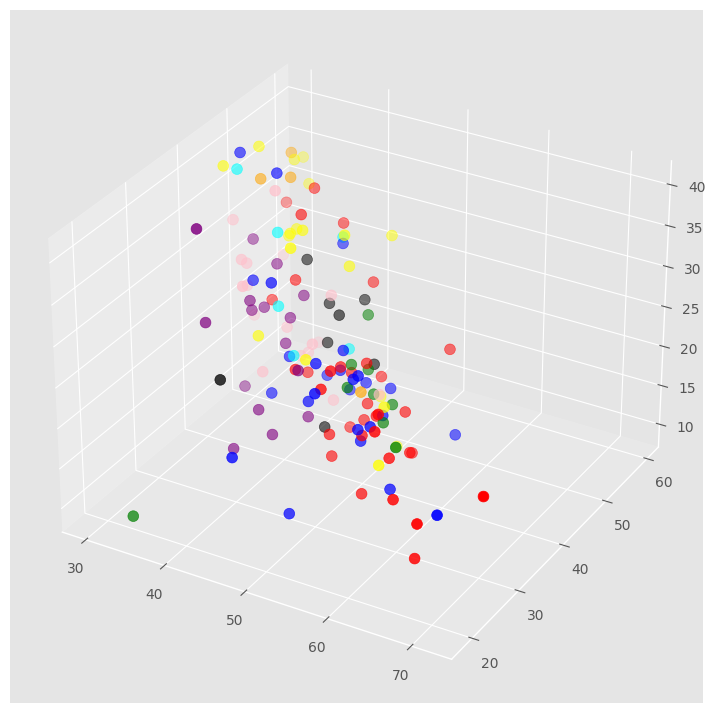

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")
colores=["Blue","red","green","yellow","orange","black","pink","purple","cyan"]
asignar=[]
for row in y:
  asignar.append(colores[row - 1]) # Subtract 1 because categories are 1-indexed
ax.scatter(X[:,0],X[:,1],X[:,2],c=asignar,s=60)
plt.show()

##1 Obtener la cantidad de centroides-obtener el calor k
Se empleara la metodologia del punto de codo para hallar la cantidad de centroides.

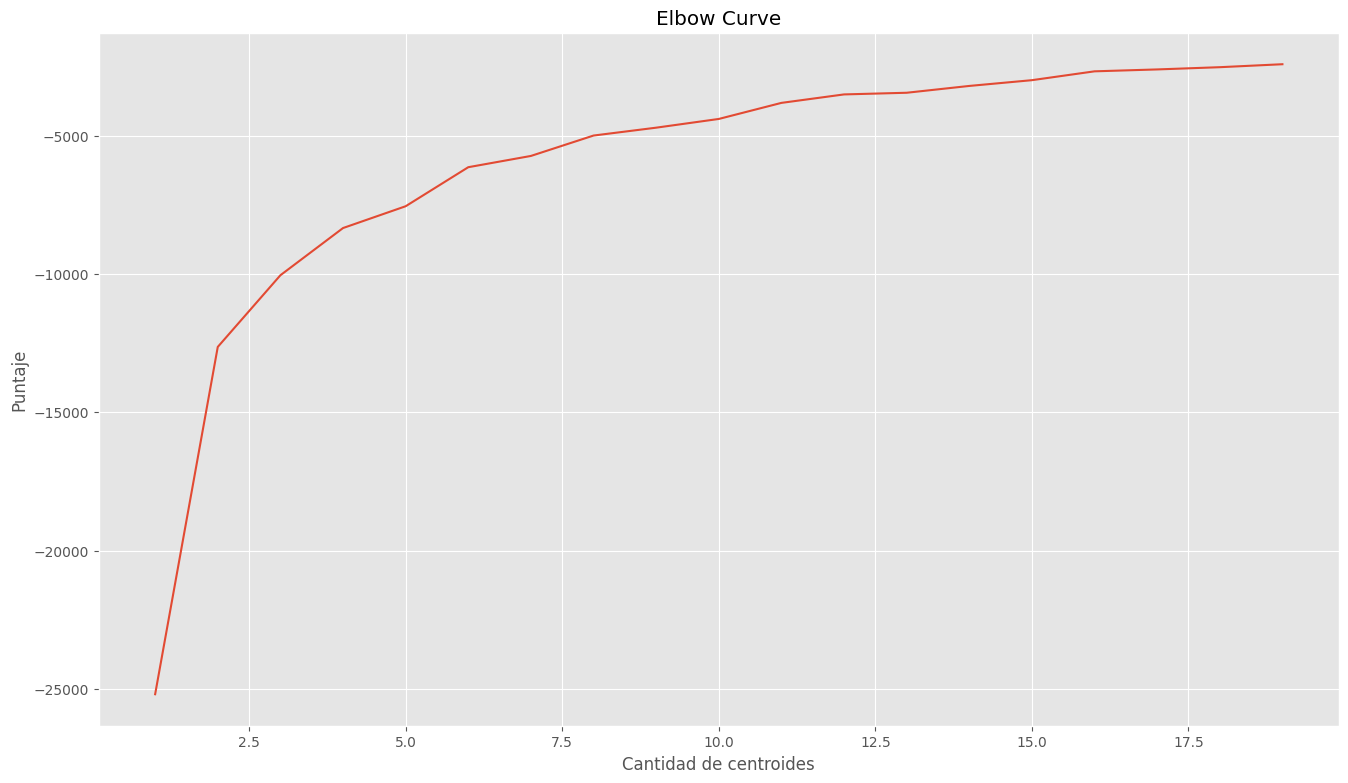

In [ ]:
Nc=range(1,20)
kmeans=[KMeans(n_clusters=i) for i in Nc]
kmeans
score=[kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel("Cantidad de centroides")
plt.ylabel("Puntaje")
plt.title("Elbow Curve")
plt.show()

Debido a lo observado se elije a K=5 porque a partir de ese punto la curva es suave

##2 Ejecusion de k-Means

Obtener la ubicacion de los 5 centroides

In [ ]:
kmeans=KMeans(n_clusters=5).fit(X)
centroids=kmeans.cluster_centers_
print(centroids)



[[39.13878513 41.96931394 27.85186871]
 [57.44424027 33.20625036 15.56946505]
 [46.80362725 38.85978881 18.73102947]
 [35.19836967 49.50818267 34.36580904]
 [33.698055   48.627437   18.18689875]]


Insertar los puntos en grafica 3D

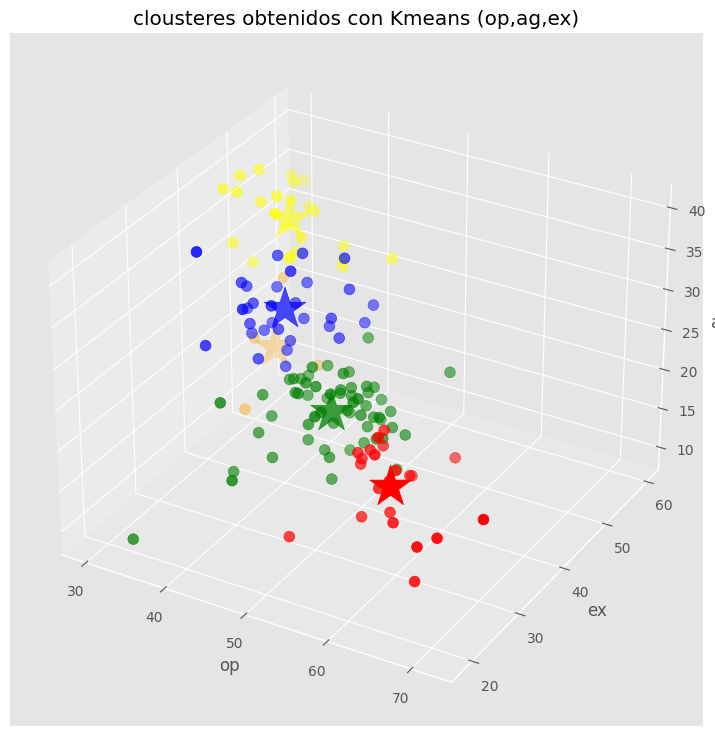

In [ ]:
#Prediciendo los clusteres

labels=kmeans.predict(X)
#colocando los puntos con junto con los clusteres
C=kmeans.cluster_centers_
colores = ["Blue", "red", "green", "yellow", "orange"]
asignar = []
for row in labels:
  asignar.append(colores[row])
fig= plt.figure()
ax=fig.add_subplot(111,projection="3d")
ax.scatter(X[:,0],X[:,1],X[:,2],c=asignar,s=60)
ax.scatter(C[:,0],C[:,1],C[:,2],marker="*",c=colores,s=1000)
ax.set_xlabel("op")
ax.set_ylabel("ex")
ax.set_zlabel("ag")
ax.set_title("clousteres obtenidos con Kmeans (op,ag,ex)")
plt.show()

Se puede observar como kmeans a agrupado a 140 usuarios de X en 5 clousteres de acuerdo a la personalidad de Openess, Extraversion y Agreeableness.

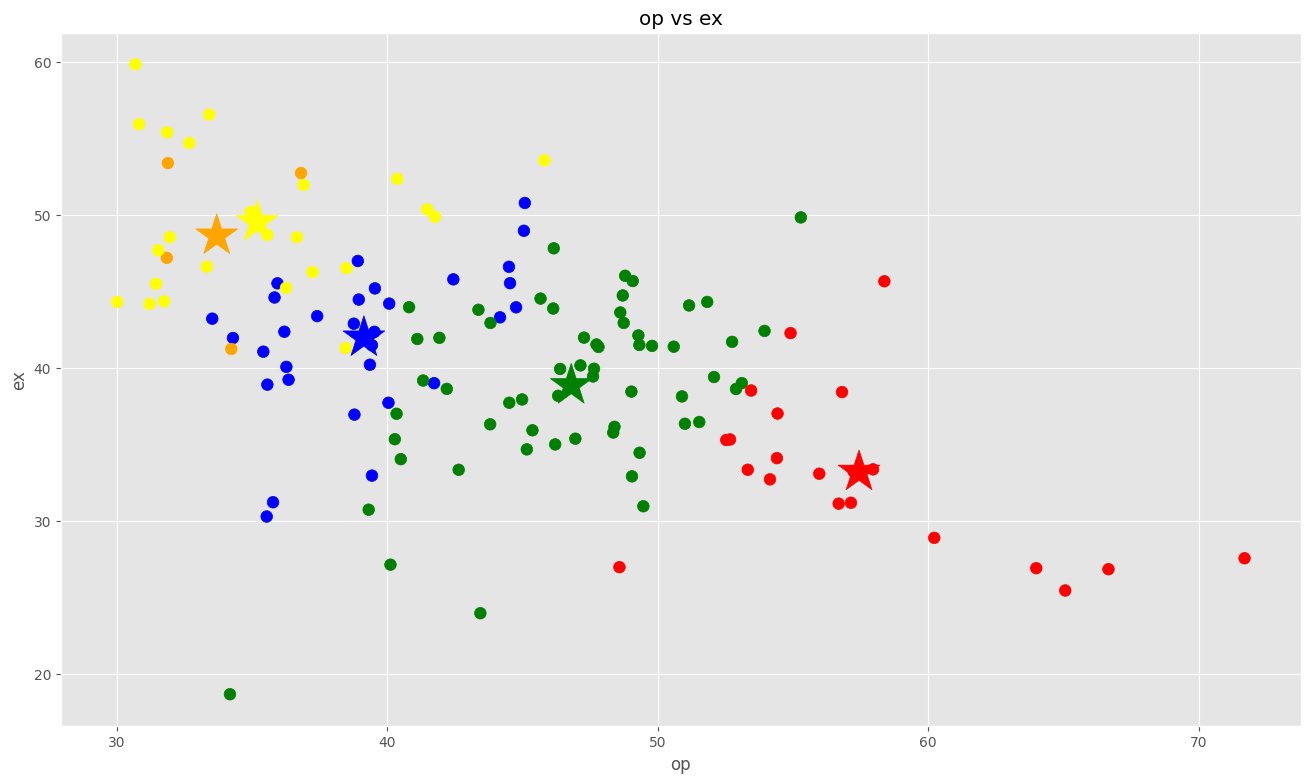

In [ ]:
#Graficando op vs ex
f1 = dataframe["op"].values
f2 = dataframe["ex"].values
plt.scatter(f1, f2,c=asignar,s=70)
plt.scatter(C[:,0],C[:,1],marker="*",c=colores,s=1000)
plt.xlabel("op")
plt.ylabel("ex")
plt.title("op vs ex")
plt.show()

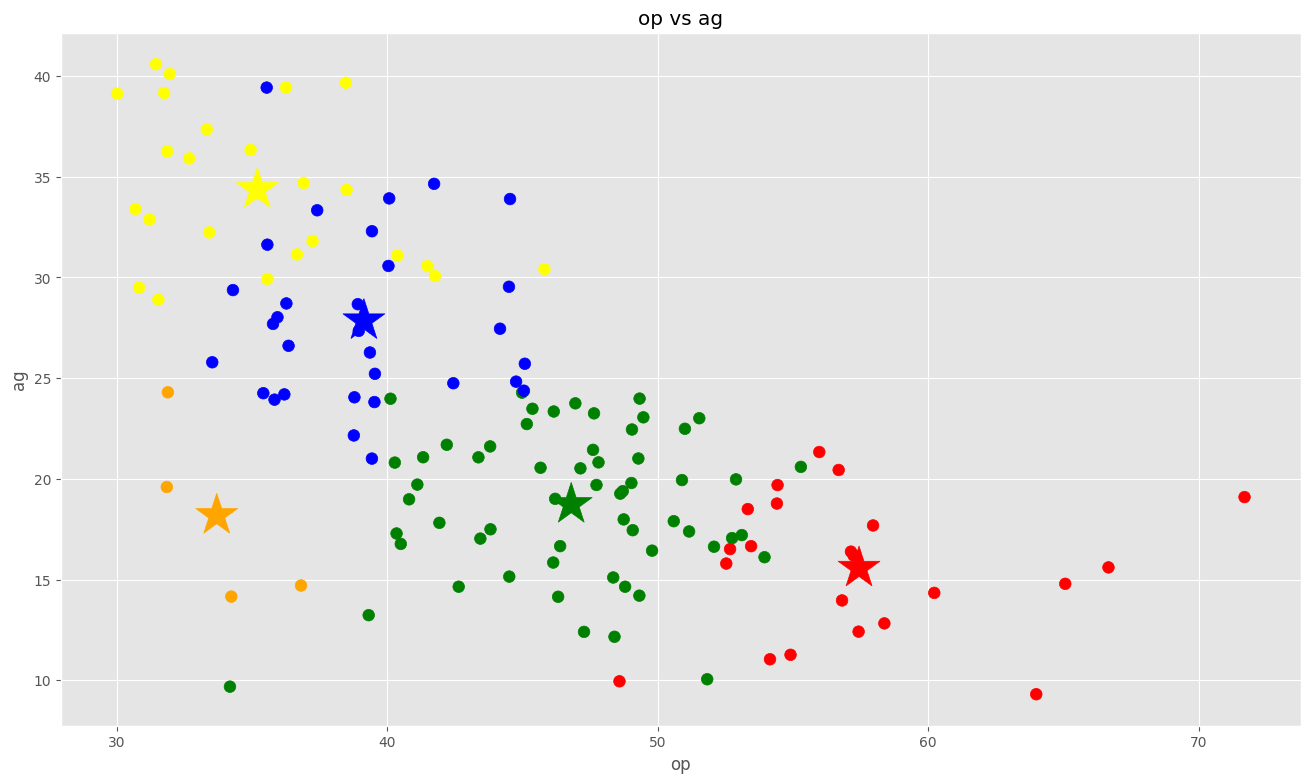

In [ ]:
#Graficando op vs ag
f1 = dataframe["op"].values
f2 = dataframe["ag"].values
plt.scatter(f1, f2,c=asignar,s=70)
plt.scatter(C[:,0],C[:,2],marker="*",c=colores,s=1000)
plt.xlabel("op")
plt.ylabel("ag")
plt.title("op vs ag")
plt.show()

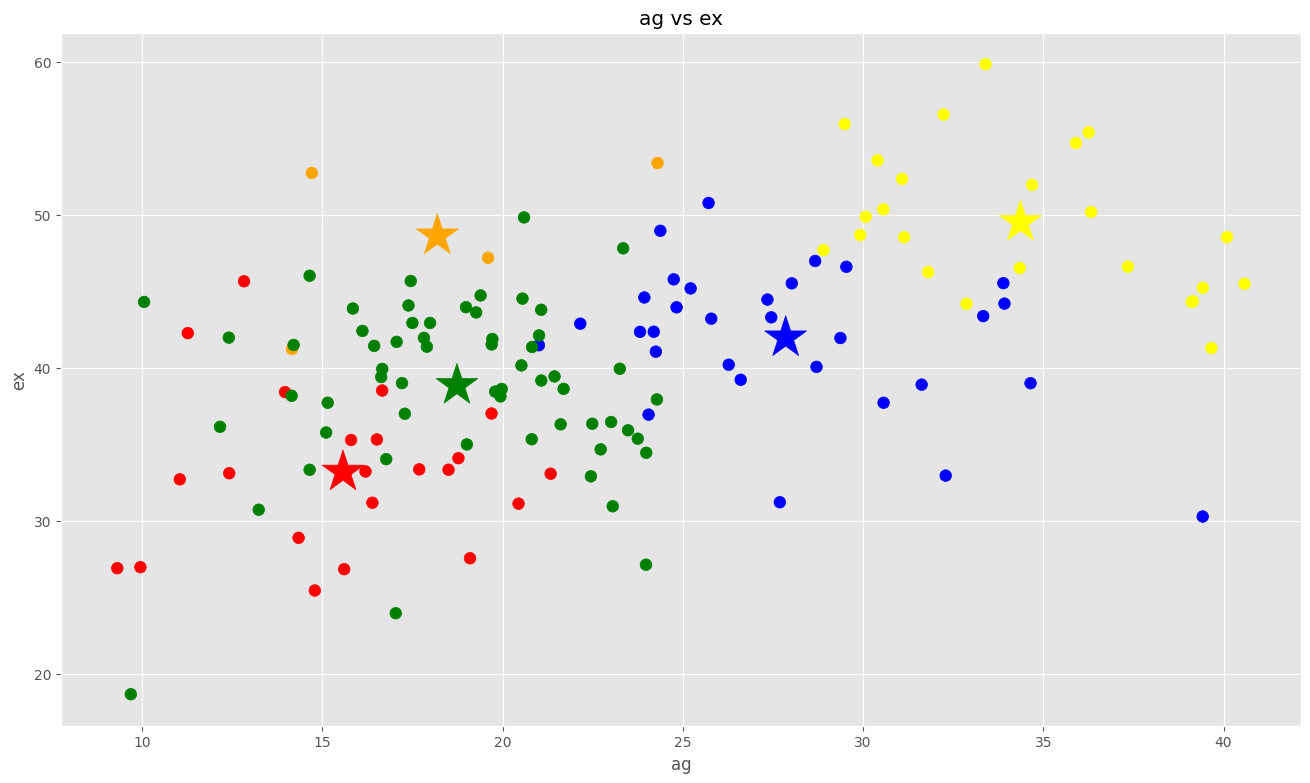

In [ ]:
#Graficando op vs ex
f1 = dataframe["ag"].values
f2 = dataframe["ex"].values
plt.scatter(f1, f2,c=asignar,s=70)
plt.scatter(C[:,2],C[:,1],marker="*",c=colores,s=1000)
plt.xlabel("ag")
plt.ylabel("ex")
plt.title("ag vs ex")
plt.show()

In [ ]:
copy=pd.DataFrame(dataframe)
copy["usuario"]=dataframe["usuario"].values
copy["categoria"]=dataframe["categoria"].values
copy["label"]=labels;
cantidadGrupo =pd.DataFrame()
cantidadGrupo["color"]=colores
cantidadGrupo["Cantidad"]=copy.groupby("label").size()
cantidadGrupo


,color,Cantidad
0,Blue,31
1,red,22
2,green,59
3,yellow,24
4,orange,4


Para finalizar, se debe categorizar cada grupo con respetcto a sus profeciones.

In [ ]:
group_referrer_index=copy.groupby("label").groups[0]
group_referreals = copy.loc[group_referrer_index]

diversidadGrupo = pd.DataFrame()
diversidadGrupo["Cantidad"]=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo["Cantidad"]=group_referreals.groupby("categoria").size()
diversidadGrupo

,Cantidad
0,NaN
1,2.0
2,3.0
3,NaN
4,5.0
5,NaN
6,4.0
7,6.0
8,9.0
9,2.0


In [ ]:
print(f"\nCategorías para el Cluster 1 (red):")
group_referrer_index = copy.groupby("label").groups[1]
group_referreals = copy.loc[group_referrer_index]
diversidadGrupo_cluster = group_referreals.groupby("categoria").size()
diversidadGrupo_cluster


Categorías para el Cluster 1 (red):


,0
categoria,
1,7
2,11
3,2
4,2


In [ ]:
print(f"\nCategorías para el Cluster 2 (green):")
group_referrer_index = copy.groupby("label").groups[2]
group_referreals = copy.loc[group_referrer_index]
diversidadGrupo_cluster = group_referreals.groupby("categoria").size()
diversidadGrupo_cluster


Categorías para el Cluster 2 (green):


,0
categoria,
1,15
2,16
3,7
4,3
5,1
6,4
7,6
8,5
9,2


In [ ]:
print(f"\nCategorías para el Cluster 3 (yellow):")
group_referrer_index = copy.groupby("label").groups[3]
group_referreals = copy.loc[group_referrer_index]
diversidadGrupo_cluster = group_referreals.groupby("categoria").size()
diversidadGrupo_cluster


Categorías para el Cluster 3 (yellow):


,0
categoria,
1,3
2,4
4,9
5,3
7,2
8,1
9,2


In [ ]:
print(f"\nCategorías para el Cluster 4 (orange):")
group_referrer_index = copy.groupby("label").groups[4]
group_referreals = copy.loc[group_referrer_index]
diversidadGrupo_cluster = group_referreals.groupby("categoria").size()
diversidadGrupo_cluster


Categorías para el Cluster 4 (orange):


,0
categoria,
7,3
8,1


In [ ]:
from itertools import pairwise
from sklearn.metrics.pairwise import pairwise_distances_argmin_min
#para ver el representante de cada clouster (el mas cercano)
closest,_=pairwise_distances_argmin_min(kmeans.cluster_centers_,X)
closest

array([65, 75, 89, 35,  6])

###TAREA
Hacer una presentacion de esto

### Re-ejecutar K-Means con K=4 y re-evaluar

--- Evaluación con K=4 ---
Homogeneidad (K=4): 0.1429
Completitud (K=4): 0.2200
V-measure (K=4): 0.1732


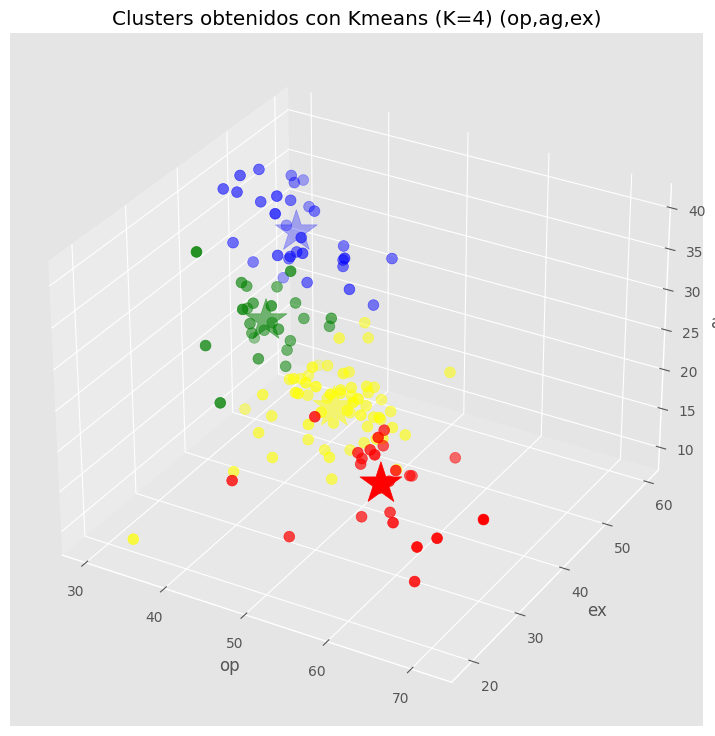

In [ ]:
# Re-ejecutar K-Means con n_clusters=4
kmeans_k4 = KMeans(n_clusters=4, random_state=42).fit(X)
labels_k4 = kmeans_k4.predict(X)

# Recalcular las métricas de evaluación para K=4
homogeneity_k4 = homogeneity_score(y, labels_k4)
completeness_k4 = completeness_score(y, labels_k4)
v_measure_k4 = v_measure_score(y, labels_k4)

print(f"--- Evaluación con K=4 ---")
print(f"Homogeneidad (K=4): {homogeneity_k4:.4f}")
print(f"Completitud (K=4): {completeness_k4:.4f}")
print(f"V-measure (K=4): {v_measure_k4:.4f}")

# También podemos visualizar los clusters para K=4
C_k4 = kmeans_k4.cluster_centers_
colores_k4 = ["Blue", "red", "green", "yellow"]
asignar_k4 = []
for row in labels_k4:
  asignar_k4.append(colores_k4[row])

fig_k4 = plt.figure()
ax_k4 = fig_k4.add_subplot(111, projection="3d")
ax_k4.scatter(X[:,0], X[:,1], X[:,2], c=asignar_k4, s=60)
ax_k4.scatter(C_k4[:,0], C_k4[:,1], C_k4[:,2], marker="*", c=colores_k4, s=1000)
ax_k4.set_xlabel("op")
ax_k4.set_ylabel("ex")
ax_k4.set_zlabel("ag")
ax_k4.set_title("Clusters obtenidos con Kmeans (K=4) (op,ag,ex)")
plt.show()

Compara estos nuevos valores con los obtenidos para K=5 (Homogeneidad: 0.1543, Completitud: 0.2230, V-measure: 0.1824) para ver si hay una mejora en la alineación de los clusters con las categorías laborales.

In [ ]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

# 'y' ya contiene las categorías originales del dataframe
# 'labels' contiene las etiquetas de cluster asignadas por KMeans

# Calcular la homogeneidad
homogeneity = homogeneity_score(y, labels)

# Calcular la completitud
completeness = completeness_score(y, labels)

# Calcular el V-measure
v_measure = v_measure_score(y, labels)

print(f"Homogeneidad: {homogeneity:.4f}")
print(f"Completitud: {completeness:.4f}")
print(f"V-measure: {v_measure:.4f}")

Homogeneidad: 0.1543
Completitud: 0.2230
V-measure: 0.1824


Estos valores nos indican qué tan bien se alinean los clusters encontrados por K-Means con las categorías laborales predefinidas. Un valor cercano a 1 para cualquiera de estas métricas indica una muy buena alineación.

### Mapeo de Clusters a Categorías y Cálculo de Métricas de Clasificación (para K=4)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Crear un DataFrame temporal para el mapeo con K=4
temp_df_k4 = pd.DataFrame({'categoria_verdadera': y, 'cluster_asignado': labels_k4})

# Determinar la categoría mayoritaria para cada cluster
cluster_to_category_k4 = {}
for cluster_id in np.unique(labels_k4):
    # Obtener todas las categorías para este cluster
    categories_in_cluster = temp_df_k4[temp_df_k4['cluster_asignado'] == cluster_id]['categoria_verdadera']
    # Encontrar la categoría más frecuente
    most_frequent_category = categories_in_cluster.mode()[0]
    cluster_to_category_k4[cluster_id] = most_frequent_category

print("Mapeo de Cluster a Categoría (K=4):")
print(cluster_to_category_k4)

# Crear las 'predicciones' basadas en el mapeo
predicted_categories_k4 = np.array([cluster_to_category_k4[label] for label in labels_k4])

# Calcular métricas de clasificación
accuracy_k4 = accuracy_score(y, predicted_categories_k4)
# Precision, Recall, F1-score para multi-clase requieren 'average' param
# Usaremos 'weighted' para tener en cuenta el desequilibrio de clases
precision_k4 = precision_score(y, predicted_categories_k4, average='weighted', zero_division=0)
recall_k4 = recall_score(y, predicted_categories_k4, average='weighted', zero_division=0)
f1_k4 = f1_score(y, predicted_categories_k4, average='weighted', zero_division=0)

print(f"\n--- Métricas de Clasificación (K=4, después del mapeo) ---")
print(f"Exactitud (Accuracy): {accuracy_k4:.4f}")
print(f"Precisión (Precision): {precision_k4:.4f}")
print(f"Recall: {recall_k4:.4f}")
print(f"F1-Score: {f1_k4:.4f}")


Mapeo de Cluster a Categoría (K=4):
{np.int32(0): np.int64(4), np.int32(1): np.int64(2), np.int32(2): np.int64(8), np.int32(3): np.int64(2)}

--- Métricas de Clasificación (K=4, después del mapeo) ---
Exactitud (Accuracy): 0.3429
Precisión (Precision): 0.1717
Recall: 0.3429
F1-Score: 0.2265


### Mapeo de Clusters a Categorías y Cálculo de Métricas de Clasificación (para K=5)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Crear un DataFrame temporal para el mapeo con K=5
temp_df_k5 = pd.DataFrame({'categoria_verdadera': y, 'cluster_asignado': labels})

# Determinar la categoría mayoritaria para cada cluster
cluster_to_category_k5 = {}
for cluster_id in np.unique(labels):
    categories_in_cluster = temp_df_k5[temp_df_k5['cluster_asignado'] == cluster_id]['categoria_verdadera']
    most_frequent_category = categories_in_cluster.mode()[0]
    cluster_to_category_k5[cluster_id] = most_frequent_category

print("Mapeo de Cluster a Categoría (K=5):")
print(cluster_to_category_k5)

# Crear las 'predicciones' basadas en el mapeo
predicted_categories_k5 = np.array([cluster_to_category_k5[label] for label in labels])

# Calcular métricas de clasificación para K=5
accuracy_k5 = accuracy_score(y, predicted_categories_k5)
precision_k5 = precision_score(y, predicted_categories_k5, average='weighted', zero_division=0)
recall_k5 = recall_score(y, predicted_categories_k5, average='weighted', zero_division=0)
f1_k5 = f1_score(y, predicted_categories_k5, average='weighted', zero_division=0)

print(f"\n--- Métricas de Clasificación (K=5, después del mapeo) ---")
print(f"Exactitud (Accuracy): {accuracy_k5:.4f}")
print(f"Precisión (Precision): {precision_k5:.4f}")
print(f"Recall: {recall_k5:.4f}")
print(f"F1-Score: {f1_k5:.4f}")


Mapeo de Cluster a Categoría (K=5):
{np.int32(0): np.int64(8), np.int32(1): np.int64(2), np.int32(2): np.int64(2), np.int32(3): np.int64(4), np.int32(4): np.int64(7)}

--- Métricas de Clasificación (K=5, después del mapeo) ---
Exactitud (Accuracy): 0.3429
Precisión (Precision): 0.2561
Recall: 0.3429
F1-Score: 0.2493


Ahora que tenemos la Exactitud para K=5 y K=4, podemos compararlas directamente.

Estos resultados deben interpretarse con la **advertencia** de que se ha realizado un mapeo de clusters a categorías a posteriori. No son 'predicciones' en el sentido tradicional de un modelo entrenado para clasificar, sino una forma de cuantificar cuántos de los puntos de un cluster *se alinean* con la categoría más frecuente de ese cluster. Un valor más alto en estas métricas indicaría una mejor 'pureza' de los clusters con respecto a las categorías laborales subyacentes.